## Feature Map (Data Encoding)

Jika ada data angka: `[0.5, 2.3]`. Komputer klasik menyimpan ini sebagai bit. Komputer kuantum tidak mengerti angka mentah, harus mengubah angka tersebut ke dalam keadaan kuantum.

Caranya? rotasi.

- Jika datanya kecil, putar qubit sedikit.
- Jika datanya besar, putar qubit banyak.

Teknik yang sering dipakai adalah `ZZFeatureMap` karena tidak hanya memutar qubit sendiri-sendiri, tapi juga membuat mereka entanglement.

/tmp/ipykernel_23257/2007808885.py:7: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=data_dimension, reps=1)


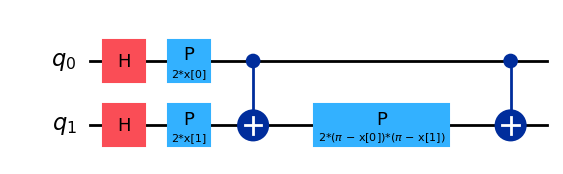

In [1]:
from qiskit.circuit.library import ZZFeatureMap

# Data dimension (e.g. 2 features, height and weight)
data_dimension = 2

# Create a feature map. reps=1 mean we repeat the encoding once.
feature_map = ZZFeatureMap(feature_dimension=data_dimension, reps=1)

# It needs to .decompose() to show the value
feature_map.decompose().draw(output='mpl')

- Akan ada gerbang `H` (Hadamard).
- Akan ada gerbang `P` (Phase) atau `Rz` dengan `2*x[0]`
- Akan ada gerbang `CNOT` (tanda + dan titik): ini yang membuat Entanglement

/tmp/ipykernel_23257/3305369865.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=data_dimension, reps=1)


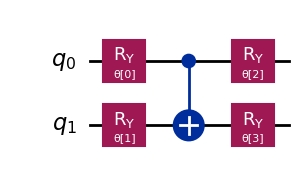

In [2]:
from qiskit.circuit.library import RealAmplitudes

# Create Ansatz. reps=1 mean we repeat the entangling and rotation layers once.
ansatz = RealAmplitudes(num_qubits=data_dimension, reps=1)

# Draw
ansatz.decompose().draw(output='mpl')

Ini adalah model machine learning-nya. Kalau di Neural Network biasa disebut Hidden Layer.

Ry dengan $\theta$, ini adalah parameter (bobot). Awalnya, nilai theta ini acak.

Tugas komputer adalah memutar-mutar (tuning) nilai sudut $\theta$ hingga hasil akhirnya sesuai dengan label data yang benar.

Gerbang `CNOT` adalah jembatan koneksi (Entanglement). Dengan gerbang ini, apa yang terjadi pada Qubit 0 akan mempengaruhi Qubit 1. Membuat model lebih pintar dan bisa mempelajari hubungan data yang kompleks.

`reps=1` maka akan diatur repetisi 1 kali. Polanya `Rotasi -> Entanglement -> Rotasi`. Semakin banyak `reps`, semakin dalam sirkuitnya (Deep Learning), tapi semakin berat komputasinya.

## Training dengan Variational Quantum Classifier (VQC)

Circuit sudah jadi (feature map + ansatz). Tinggal butuh alat untuk melatihnya. Di sini akan menggunakan algoritma VQC.

Gunakan data dummy dulu.

In [3]:
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
import numpy as np

# Create a simple dummy data
# X (feature): 4 sample, 2 features
X = np.array([[0.1, 0.2], [0.2, 0.1],  # Group A (small number)
              [0.8, 0.9], [0.9, 0.8]]) # Group B (large number)

# Label y: 0 for Group A, 1 for Group B
y = np.array([0, 0, 1, 1])

# Define the optimizer (that update the theta)
optimizer = COBYLA(maxiter=40)

# VQC
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=optimizer)

# TRAINING
print("Training model...")
vqc.fit(X, y)

# Testing (predict)
print("Training complete. Testing model.")
test_data = np.array([[0.15, 0.15],  # Expected: Group A (0)
                      [0.85, 0.85]]) # Expected: Group B (1)
predicted = vqc.predict(test_data)

print(f"New data: {test_data[0]} -> predicted class: {predicted[0]}")
print(f"New data: {test_data[1]} -> predicted class: {predicted[1]}")

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Training model...
Training complete. Testing model.
New data: [0.15 0.15] -> predicted class: 0
New data: [0.85 0.85] -> predicted class: 1
